In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
sns.set(style="whitegrid")
pd.set_option('display.max_columns', 100)
healthy_orange = '#EC6602'
healthy_orange_50 = '#F9B591'
healthy_orange_25 = '#FDDDCB'
siemens_petrol = '#009999'
siemens_petrol_50 = '#87D2D2'
sns.set_palette([healthy_orange, siemens_petrol, healthy_orange_50, healthy_orange_25, siemens_petrol_50])
RANDOM_SEED = 42

In [22]:
df = pd.read_csv('../data/auto.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [23]:
df.isna().mean()

mpg             0.0
cylinders       0.0
displacement    0.0
horsepower      0.0
weight          0.0
acceleration    0.0
year            0.0
origin          0.0
name            0.0
dtype: float64

In [24]:
df.duplicated().mean()

0.0

In [25]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

In [26]:
cat_cols = ['origin', 'name', 'year', 'cylinders']
num_cols = [col for col in df.columns if col not in cat_cols]

print('Categorical Columns:', cat_cols)
print('Numerical Columns:', num_cols)

Categorical Columns: ['origin', 'name', 'year', 'cylinders']
Numerical Columns: ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']


In [27]:
df[cat_cols] = df[cat_cols].astype('category')

In [28]:
df[num_cols].describe()

,mpg,displacement,horsepower,weight,acceleration
count,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,194.411990,104.469388,2977.584184,15.541327
std,7.805007,104.644004,38.491160,849.402560,2.758864
min,9.000000,68.000000,46.000000,1613.000000,8.000000
25%,17.000000,105.000000,75.000000,2225.250000,13.775000
50%,22.750000,151.000000,93.500000,2803.500000,15.500000
75%,29.000000,275.750000,126.000000,3614.750000,17.025000
max,46.600000,455.000000,230.000000,5140.000000,24.800000


In [29]:
df.drop(df.index[11:80])[num_cols].describe()

,mpg,displacement,horsepower,weight,acceleration
count,323.000000,323.000000,323.000000,323.00000,323.000000
mean,24.336842,187.934985,101.300310,2936.03096,15.678638
std,7.848862,100.685687,36.138273,811.06217,2.719633
min,11.000000,68.000000,46.000000,1649.00000,8.500000
25%,18.000000,98.000000,75.000000,2212.50000,14.000000
50%,23.900000,145.000000,91.000000,2790.00000,15.500000
75%,30.250000,254.000000,115.000000,3522.50000,17.200000
max,46.600000,455.000000,230.000000,4997.00000,24.800000


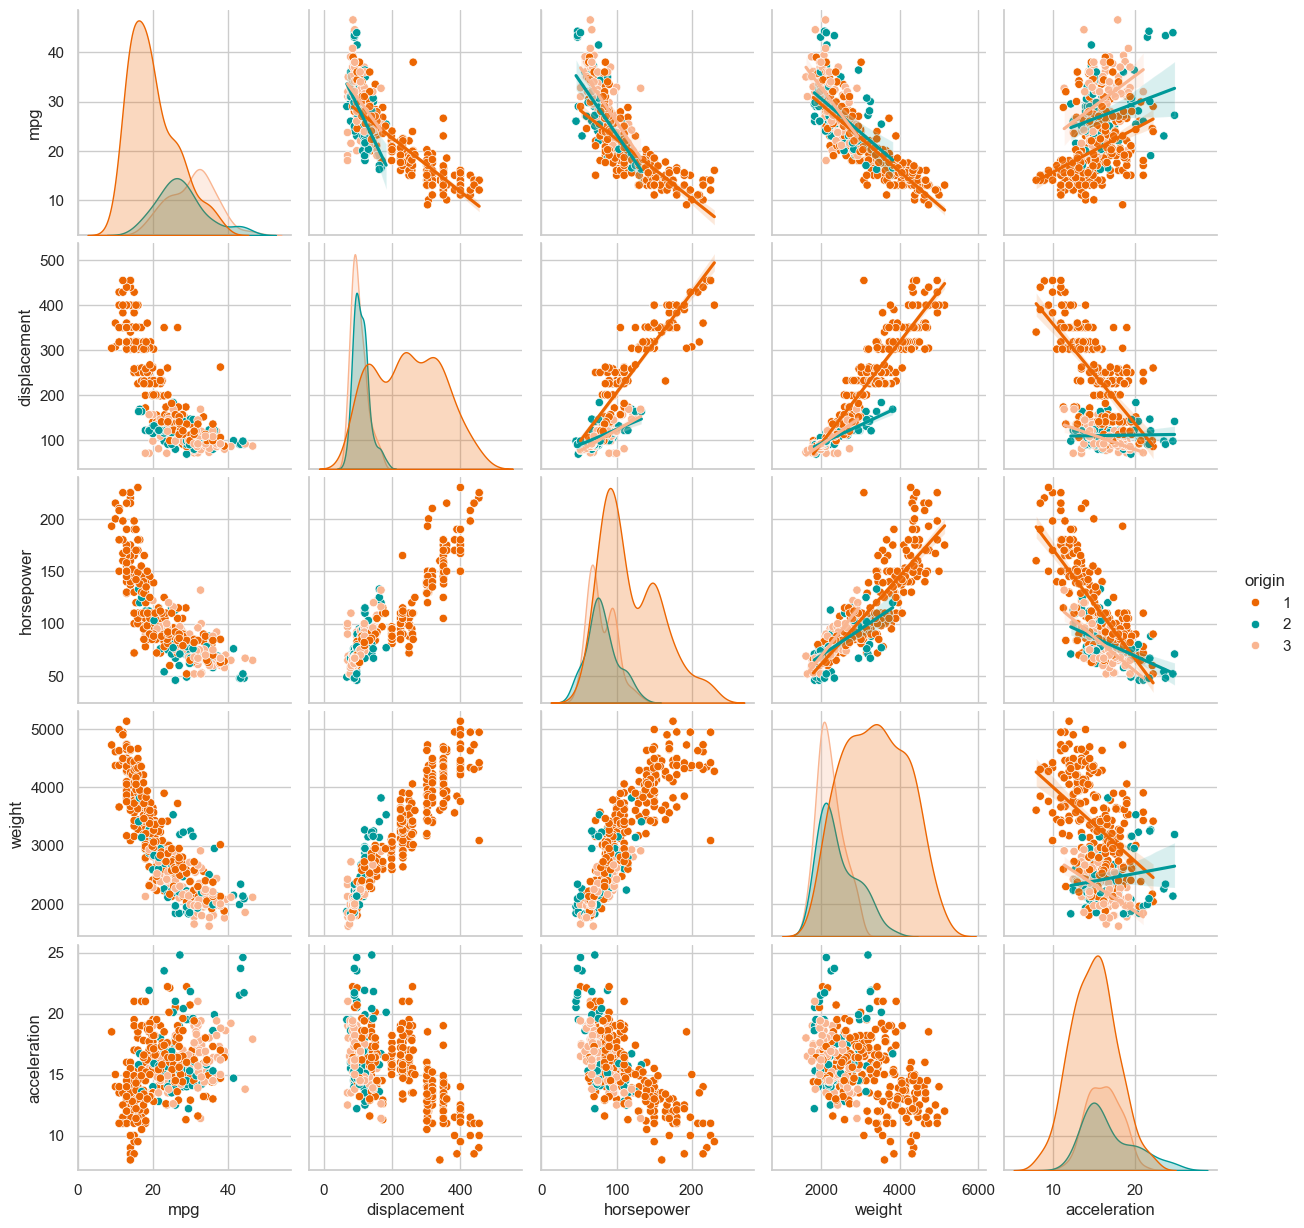

In [30]:
g = sns.pairplot(df, diag_kind='kde', hue='origin')
g.map_upper(sns.regplot, scatter=False);

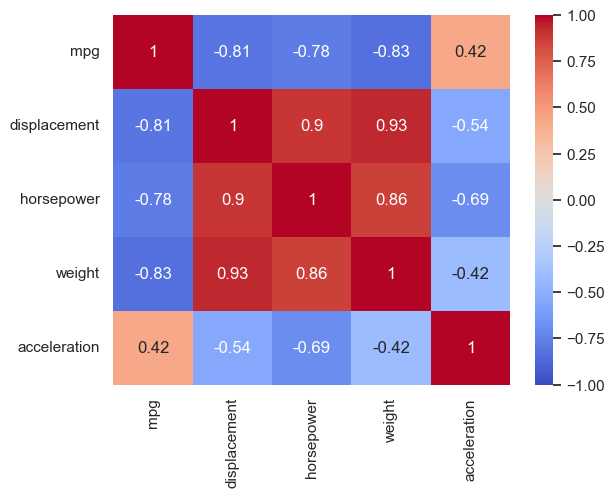

In [31]:
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', center=0, vmin=-1);

In [32]:
def plot_bar(df, with_col, num_cols):
    ncols = 3
    nrows = len(num_cols) // ncols + 1

    fig, axes = plt.subplots(nrows, ncols, figsize=(15, 5 * nrows))

    axes = axes.flatten()

    for i, col in enumerate(num_cols):
        sns.barplot(x=with_col, y=col, data=df, errorbar='sd', ax=axes[i], estimator='mean')
    
    fig.suptitle(f'Mean by {with_col}')

    plt.tight_layout()
    plt.show()

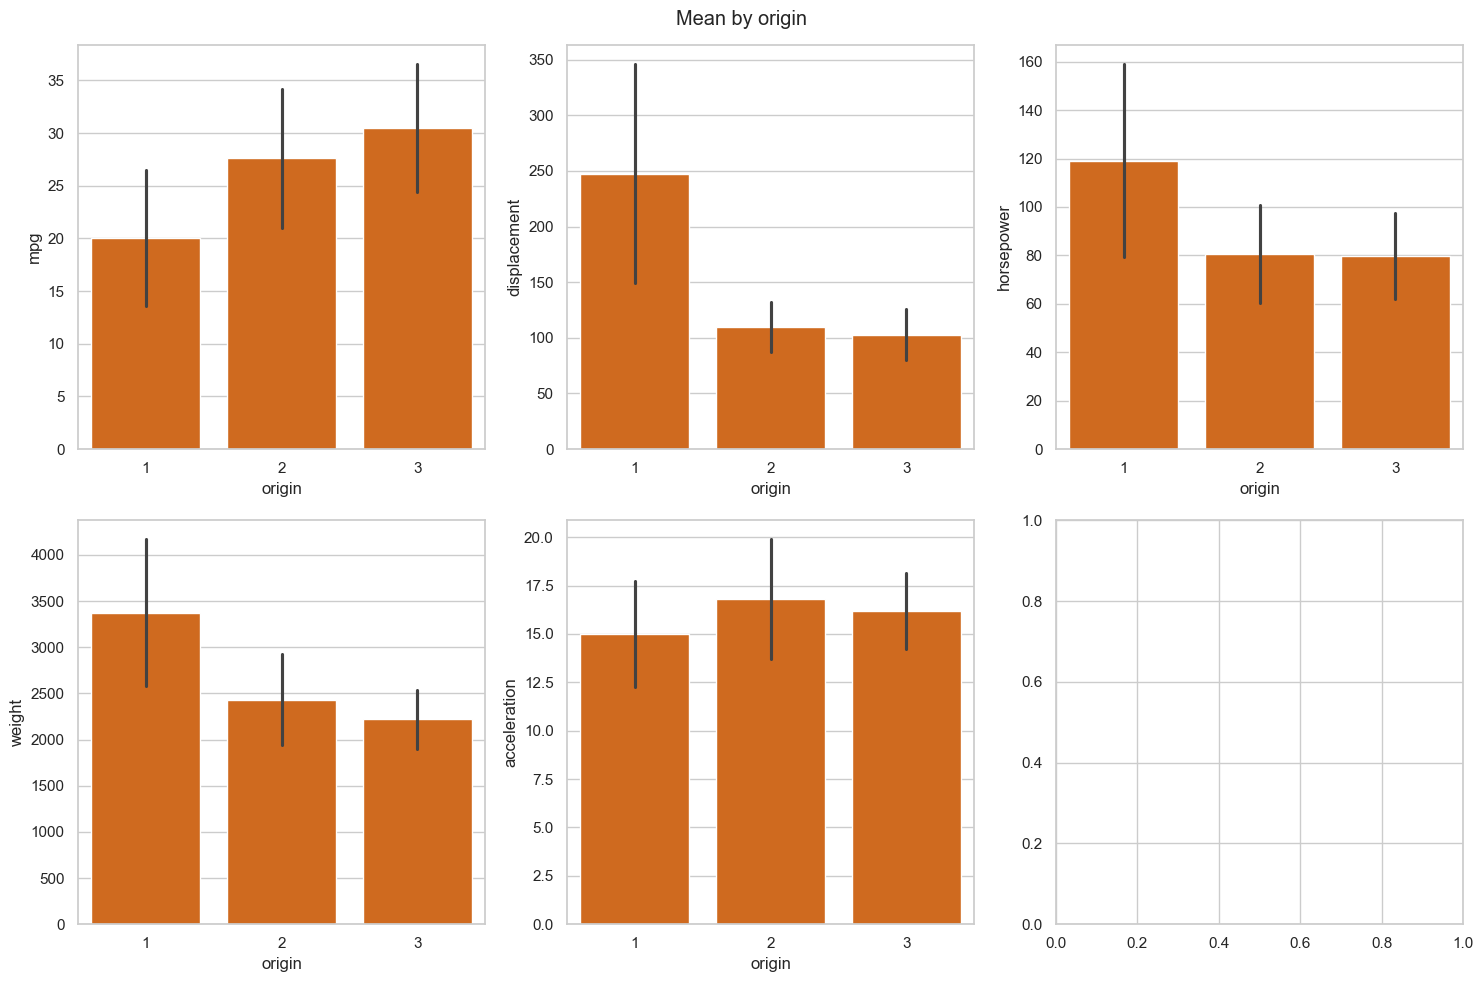

In [33]:
plot_bar(df, 'origin', num_cols);

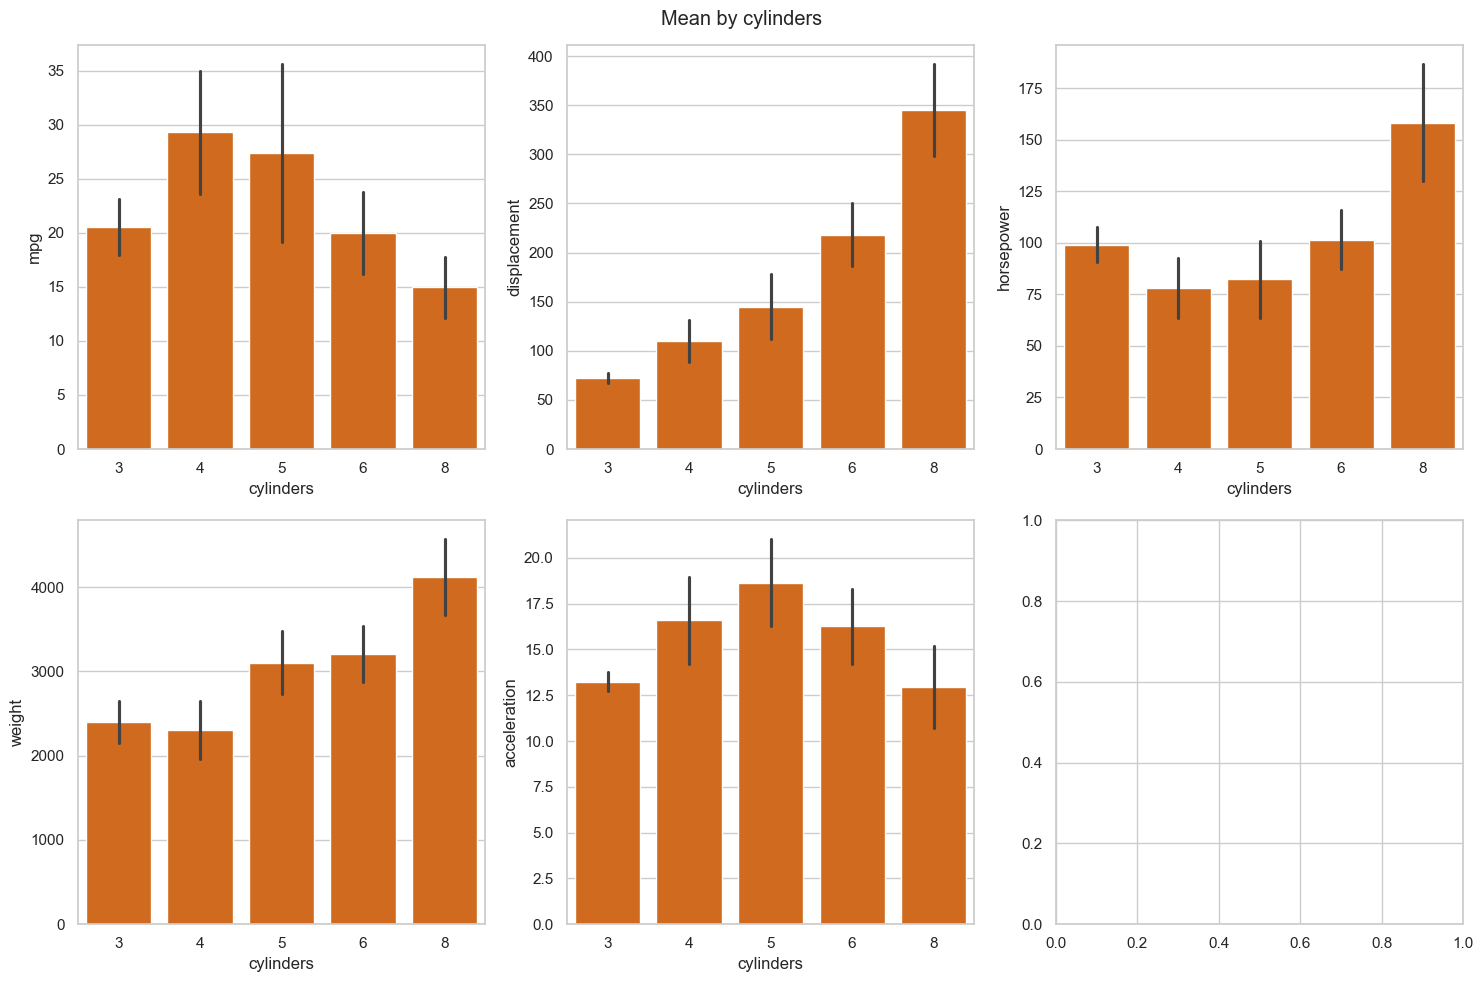

In [34]:
plot_bar(df, 'cylinders', num_cols);

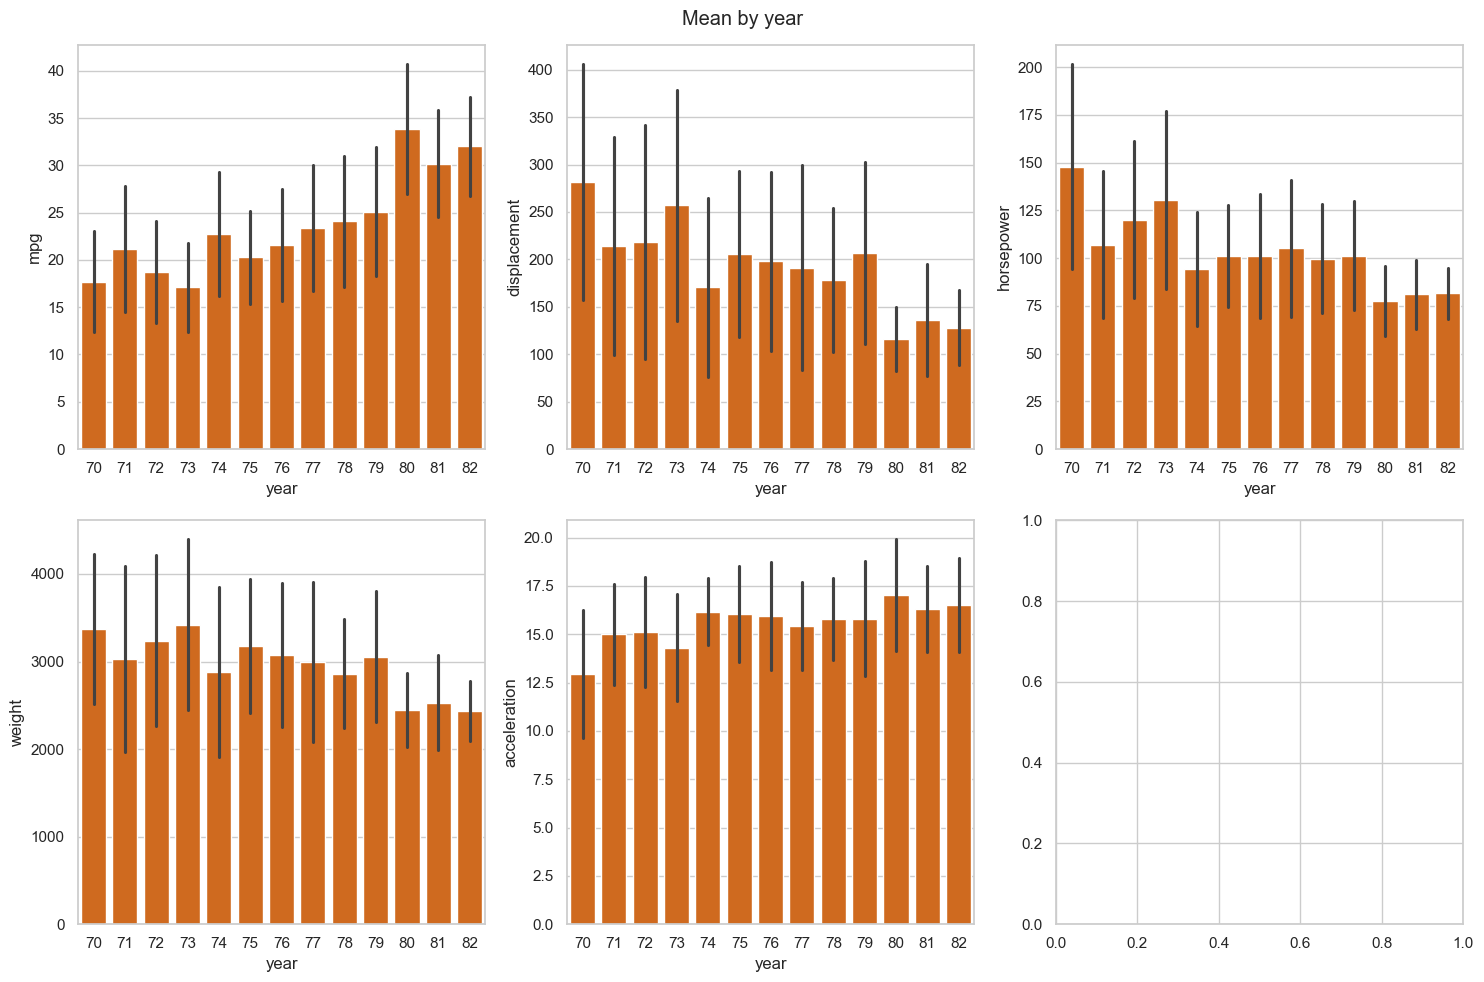

In [35]:
plot_bar(df, 'year', num_cols);

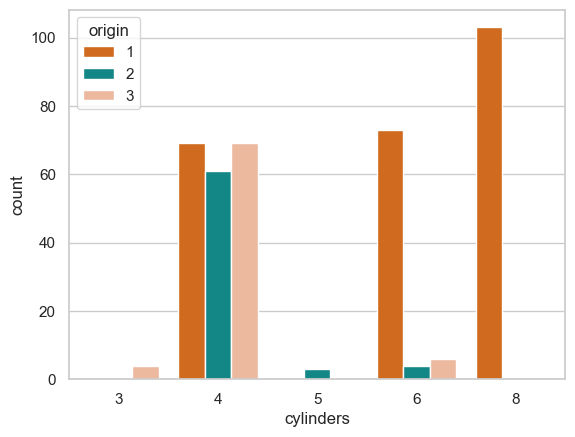

In [36]:
sns.countplot(x='cylinders', hue='origin', data=df);

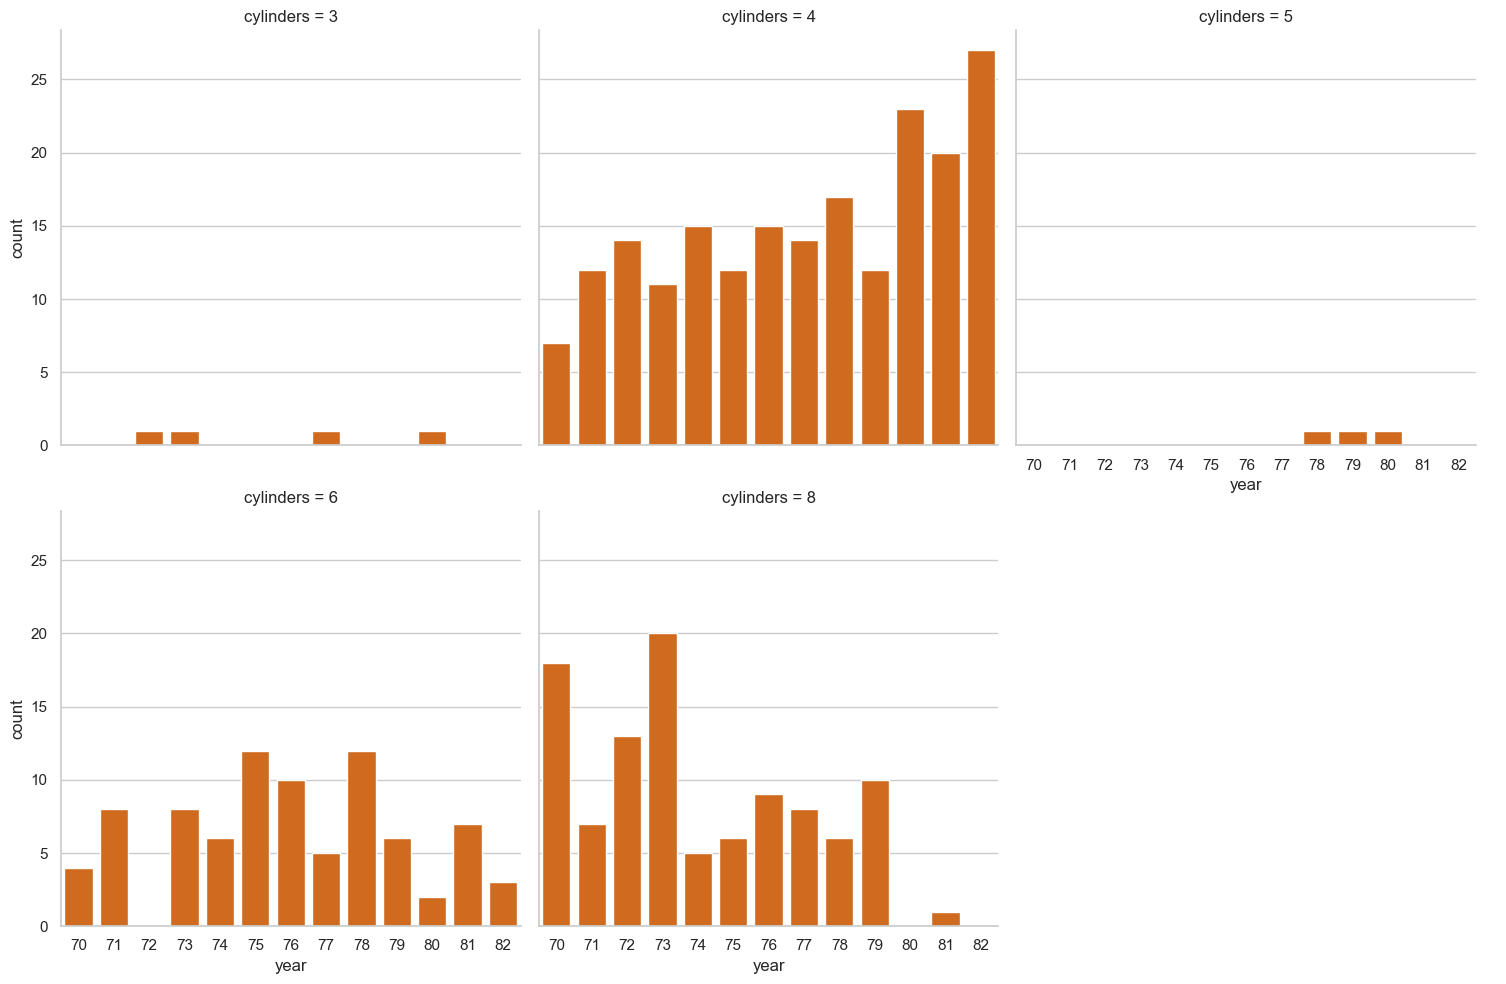

In [37]:
sns.catplot(x='year', col='cylinders', kind='count', data=df, col_wrap=3);

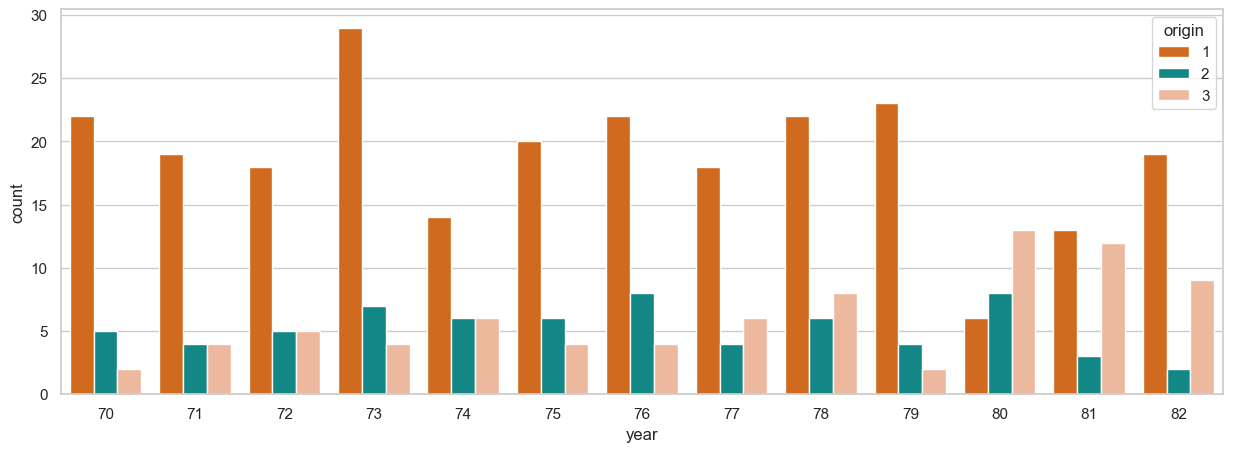

In [38]:
plt.figure(figsize=(15, 5))
sns.countplot(x='year', hue='origin', data=df);

Um Benzinverbrauch vorherzusagen, die Variablen weight, horsepower, displacement, cylinders, year und origin nützlich sein können, da sie einen guten Zusammenhang haben.